# Wie bildet Neuronales Netz mathemathische Funktionen nach?  

## Definition einer Linearen Funktion

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

def linear(slope, offset, x):
    return slope*x+offset

def get_data(slope, offset):
    x_list = [*range(50)]
    y_list = []
    for i in x_list:
        y_list.append(linear(slope,offset,i))
    return x_list, y_list




### wir testen 2*x+2

In [2]:

x_list, y_list = get_data(2,2)

## Test mit einem tiefen Netz

In [3]:
# ein eingang -> 3 * 40 Neuronen vollvernetzt -> 1 Ausgang
model = tf.keras.Sequential()
model.add(Dense(units=40, input_dim=1, activation='relu'))
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=1, activation='relu'))

model.compile(optimizer='adam', loss='mean_squared_error')

In [4]:
model.fit(x=x_list, y=y_list, epochs=500, verbose=0)
model.evaluate(x=x_list, y=y_list)

2/2 [==============================] - 0s 3ms/step - loss: 3434.0000


3434.0

Das ist kein gutes Ergebnis.

## Test mit einem breiteren tiefen Netz

In [5]:
# ein eingang -> 3 * 400 Neuronen vollvernetzt -> 1 Ausgang
model = tf.keras.Sequential()
model.add(Dense(units=400, input_dim=1, activation='relu'))
model.add(Dense(units=400, activation='relu'))
model.add(Dense(units=400, activation='relu'))
model.add(Dense(units=1, activation='relu'))

model.compile(optimizer='adam', loss='mean_squared_error')


In [6]:
model.fit(x=x_list, y=y_list, epochs=500, verbose=0)
model.evaluate(x=x_list, y=y_list)

2/2 [==============================] - 0s 4ms/step - loss: 0.0037


0.0036702610086649656

Das Ergebniss sieht für ML-Verhältnisse gut aus, aber brauchen wir wirklich 1200 Neuronen um uns einer einfachen Linearen Funktion nur anzunähern? 

## Das optimale Netz 

Ein neuron besteht Mathematisch aus einer Gewischtung des Eingangs, einer Konstanten und der Aktivierungskunktion. Die Aktivierungsfunktion 'Relu' lässt alles unverändert durch was größer als Null ist. 
Eine Lineare funktion definiert sich über zwei Parameter: Die Steigung und den Schnittpunkt mit der Y-Achse. Ein Neuron wär also in der Lage eine Lineare Funktion abzubilden. 

Warum hat der erste Versuch nicht geklappt und sogar der Zweite war nicht perfekt? Versuchen wir ein Netz aus einem Neuron. Das sogenannte Perceptron. 


In [7]:
model = tf.keras.Sequential()
model.add(Dense(units=1, input_dim=1, activation='relu'))

model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(x=x_list, y=y_list, epochs=500, verbose=0)
model.evaluate(x=x_list, y=y_list)

2/2 [==============================] - 0s 2ms/step - loss: 0.4959


0.4959096610546112

Wieder scheitert das Netz. Da wir die Theorie kennen, werfen wir also ein Blick auf das Innenleben.

In [10]:
print('Gewichtung: ' + str(model.get_weights()[0][0][0]))
print('Konstante: ' + str(model.get_weights()[1][0]))

Gewichtung: 2.0424795
Konstante: 0.61266863


Wir kennen die Lösung für die Aufgabe. Testen wir diese indem wir die Werte händisch anpassen und das modell wieder evaluieren.

In [11]:
import numpy

weight = 2.
bias = 2.
model.layers[0].set_weights([numpy.array([[weight]]),numpy.array([bias])])

model.evaluate(x=x_list, y=y_list)

2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00


0.0

Wir sehen das es mit den richtigen Werten funktioniert. Doch wieso schafft es das Netzwerk nicht innerhalb von 500 Epochen auf diesen Wert zu kommen?

## Lernanalyse

Schauen wir uns an wie sich die Gewichte verhalten im Lernprozess.

In [30]:
model = tf.keras.Sequential()
model.add(Dense(units=1, input_dim=1, activation='relu'))

model.compile(optimizer='adam', loss='mean_squared_error')

epochs_list = [*range(500)]
weight_list = []
const_list = []

for i in epochs_list:
    model.fit(x=x_list, y=y_list, epochs=1, verbose=0)
    weight_list.append(model.get_weights()[0][0][0])
    const_list.append(model.get_weights()[1][0])


model.evaluate(x=x_list, y=y_list)

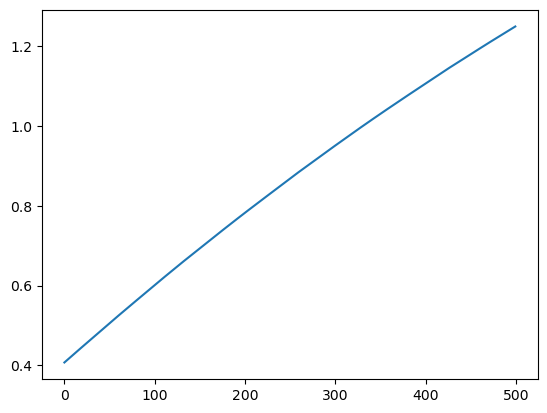

In [31]:
import matplotlib
%matplotlib inline
#matplotlib.use("Agg")
import matplotlib.pyplot as plt


#len(epochs_list)
plt.plot(epochs_list, weight_list)
plt.show()


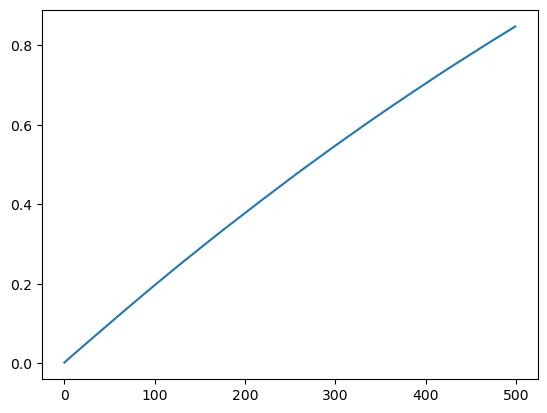

In [32]:
plt.plot(epochs_list, const_list)
plt.show()